In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

In [3]:
data = pd.read_csv('SoccerData/mls.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4995 entries, 0 to 4994
Data columns (total 16 columns):
Date        4995 non-null object
Season      4995 non-null int64
home        4995 non-null object
visitor     4995 non-null object
FT          4995 non-null object
hgoal       4995 non-null int64
vgoal       4995 non-null int64
hconf       4995 non-null object
vconf       4995 non-null object
totgoal     4995 non-null int64
round       4995 non-null object
leg         237 non-null float64
hgoalaet    47 non-null float64
vgoalaet    47 non-null float64
hpen        23 non-null float64
vpen        23 non-null float64
dtypes: float64(5), int64(4), object(7)
memory usage: 624.4+ KB


In [5]:
data_reg = data[data['round']=='regular']

In [6]:
data_reg['Date'] = pd.to_datetime(data_reg['Date'], format='%Y-%m-%d')

C:\Users\emil\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


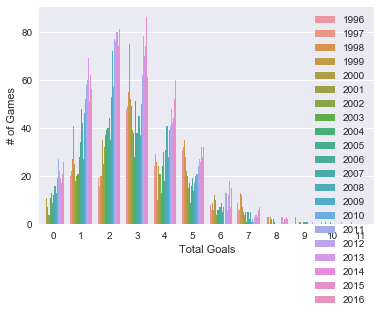

In [7]:
sns.set()
_ = sns.countplot(x = 'totgoal', hue = 'Season', data=data_reg)
_ = plt.xlabel('Total Goals')
_ = plt.ylabel('# of Games')
plt.legend(loc='upper right')
#plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,20)
plt.show()

In [8]:
data_reg = data[data['round']=='regular']

In [9]:
teamrecords = defaultdict(lambda: defaultdict(int))
homerecords = defaultdict(lambda: defaultdict(int))
visitorrecords = defaultdict(lambda: defaultdict(int))
for index, row in data_reg.iterrows():
    hgoal = row['hgoal']
    vgoal = row['vgoal']
    hteam = row['home']
    vteam = row['visitor']
    
    teamrecords[hteam]['GF'] += hgoal
    teamrecords[vteam]['GF'] += vgoal
    teamrecords[hteam]['GA'] += vgoal
    teamrecords[vteam]['GA'] += hgoal
    
    homerecords[hteam]['GF'] += hgoal
    homerecords[hteam]['GA'] += vgoal
    
    visitorrecords[vteam]['GF'] += vgoal
    visitorrecords[vteam]['GA'] += hgoal
    
    if (hgoal > vgoal):
        homerecords[hteam]['W'] += 1
        visitorrecords[vteam]['L'] += 1
        teamrecords[hteam]['W'] += 1
        teamrecords[vteam]['L'] += 1
    elif (hgoal < vgoal):
        homerecords[hteam]['L'] += 1
        visitorrecords[vteam]['W'] += 1
        teamrecords[hteam]['L'] += 1
        teamrecords[vteam]['W'] += 1
    else:
        homerecords[hteam]['T'] += 1
        visitorrecords[vteam]['T'] += 1
        teamrecords[hteam]['T'] += 1
        teamrecords[vteam]['T'] += 1
        
        

In [10]:
alltime_reg = pd.DataFrame.from_dict(teamrecords, orient = 'index')
alltime_home_reg = pd.DataFrame.from_dict(homerecords, orient = 'index')
alltime_visitor_reg = pd.DataFrame.from_dict(visitorrecords, orient = 'index')

In [11]:
alltime_reg['PTS'] = alltime_reg['W']*3 + alltime_reg['T']
alltime_reg['GP'] = alltime_reg['W'] + alltime_reg['L'] + alltime_reg['T']
alltime_reg['PPG'] = alltime_reg['PTS']/alltime_reg['GP']
alltime_reg['GD'] = alltime_reg['GF'] - alltime_reg['GA']
alltime_reg = alltime_reg[['GP','W','L','T','PTS', 'PPG', 'GF', 'GA', 'GD']]
alltime_reg = alltime_reg.sort_values('PPG', ascending = False)

In [12]:
alltime_home_reg['PTS'] = alltime_home_reg['W']*3 + alltime_home_reg['T']
alltime_home_reg['GP'] = alltime_home_reg['W'] + alltime_home_reg['L'] + alltime_home_reg['T']
alltime_home_reg['PPG'] = alltime_home_reg['PTS']/alltime_home_reg['GP']
alltime_home_reg['GD'] = alltime_home_reg['GF'] - alltime_home_reg['GA']
alltime_home_reg = alltime_home_reg[['GP','W','L','T','PTS', 'PPG', 'GF', 'GA', 'GD']]
alltime_home_reg = alltime_home_reg.sort_values('PPG', ascending = False)

In [13]:
alltime_visitor_reg['PTS'] = alltime_visitor_reg['W']*3 + alltime_visitor_reg['T']
alltime_visitor_reg['GP'] = alltime_visitor_reg['W'] + alltime_visitor_reg['L'] + alltime_visitor_reg['T']
alltime_visitor_reg['PPG'] = alltime_visitor_reg['PTS']/alltime_visitor_reg['GP']
alltime_visitor_reg['GD'] = alltime_visitor_reg['GF'] - alltime_visitor_reg['GA']
alltime_visitor_reg = alltime_visitor_reg[['GP','W','L','T','PTS', 'PPG', 'GF', 'GA', 'GD']]
alltime_visitor_reg = alltime_visitor_reg.sort_values('PPG', ascending = False)

In [14]:
alltime_reg_combined = pd.concat([alltime_reg, alltime_home_reg, alltime_visitor_reg], axis = 1, keys=('Total', 'Home', 'Away'), sort = False)

In [15]:
alltime_reg_combined

Total                                                  \
                          GP    W    L    T   PTS       PPG    GF    GA   GD   
Seattle Sounders         264  123   81   60   429  1.625000   379   305   74   
LA Galaxy                662  307  216  139  1060  1.601208  1072   845  227   
Miami Fusion             122   56   56   10   178  1.459016   209   223  -14   
FC Dallas                662  278  256  128   962  1.453172   995   967   28   
DC United                662  275  260  127   952  1.438066  1031   978   53   
Sporting Kansas City     663  270  253  140   950  1.432881   938   906   32   
Chicago Fire             599  237  217  145   856  1.429048   875   830   45   
Columbus Crew            662  270  257  135   945  1.427492   977   946   31   
New York Red Bulls       662  266  262  134   932  1.407855  1006   991   15   
Houston Dynamo           356  130  118  108   498  1.398876   465   448   17   
San Jose Earthquakes     599  230  232  137   827  1.380634   841   833    8   
Portland Timbers         204   72   69   63   279  1.367647   278   281   -3   
Real Salt Lake           389  143  144  102   531  1.365039   517   500   17   
Tampa Bay Mutiny         187   83   98    6   255  1.363636   322   353  -31   
New York City FC          68   25   27   16    91  1.338235   111   113   -2   
Colorado Rapids          663  250  276  137   887  1.337858   882   969  -87   
New England Revolution   663  250  281  132   882  1.330317   938  1017  -79   
Vancouver Whitecaps      203   68   79   56   260  1.280788   255   269  -14   
Montreal Impact          170   58   71   41   215  1.264706   230   255  -25   
Orlando City              68   21   25   22    85  1.250000   101   116  -15   
Philadelphia Union       234   72   96   66   282  1.205128   303   335  -32   
Toronto FC               324   91  144   89   362  1.117284   384   498 -114   
CD Chivas USA            320   92  149   79   355  1.109375   351   482 -131   

                       Home ...       Away                                    \
                         GP ...    GD   GP    W    L   T  PTS       PPG   GF   
Seattle Sounders        132 ...    95  132   45   52  35  170  1.287879  170   
LA Galaxy               331 ...   270  331  109  145  77  404  1.220544  456   
Miami Fusion             61 ...    25   61   18   38   5   59  0.967213   83   
FC Dallas               331 ...   179  331   94  169  68  350  1.057402  427   
DC United               331 ...   182  331   97  168  66  357  1.078550  396   
Sporting Kansas City    331 ...   155  332   94  162  76  358  1.078313  378   
Chicago Fire            300 ...   145  299   87  145  67  328  1.096990  391   
Columbus Crew           331 ...   162  331   99  167  65  362  1.093656  416   
New York Red Bulls      331 ...   163  331   89  168  74  341  1.030211  419   
Houston Dynamo          178 ...   100  178   38   83  57  171  0.960674  171   
San Jose Earthquakes    299 ...   149  300   83  156  61  310  1.033333  347   
Portland Timbers        102 ...    59  102   20   50  32   92  0.901961  103   
Real Salt Lake          194 ...   132  195   43  107  45  174  0.892308  204   
Tampa Bay Mutiny         94 ...    25   93   35   56   2  107  1.150538  140   
New York City FC         34 ...    10   34   11   17   6   39  1.147059   44   
Colorado Rapids         332 ...   154  331   80  190  61  301  0.909366  376   
New England Revolution  331 ...   122  332   87  176  69  330  0.993976  399   
Vancouver Whitecaps     102 ...    44  101   21   53  27   90  0.891089   92   
Montreal Impact          85 ...    40   85   14   48  23   65  0.764706   81   
Orlando City             34 ...     9   34    8   16  10   34  1.000000   45   
Philadelphia Union      117 ...    32  117   24   64  29  101  0.863248  130   
Toronto FC              162 ...    26  162   28   96  38  122  0.753086  169   
CD Chivas USA           160 ...   -12  160   31   86  43  136  0.850000  160   

                     

### Starting to write functions that I can use for features for machine learning based predictions

In [16]:
#returns the points that a team has earned in their last 5 games
def last5gamepoints(team, season, date):
    data_team = data_reg[((data_reg['home'] == team) | (data_reg['visitor'] == team)) & (data_reg['Season'] == season) & (data_reg['Date']<date)]
    points = 0
    data_team = data_team.tail(5)
    for index,row in data_team.iterrows():
        if row['home'] == team:
            if row['hgoal'] > row['vgoal']:
                points += 3
            elif row['hgoal'] == row['vgoal']:
                points += 1
        elif row['visitor'] == team:
            if row['vgoal'] > row['hgoal']:
                points += 3
            elif row['vgoal'] == row['hgoal']:
                points += 1
    return points

l5gp = last5gamepoints('FC Dallas', 2016, '2016-04-23')
l5gp

11

In [17]:
#returns the points that a team has earned up to the date
def pointsup2date(team, season, date):
    data_team = data_reg[((data_reg['home'] == team) | (data_reg['visitor'] == team)) & (data_reg['Season'] == season) & (data_reg['Date']<date)]
    points = 0
    for index,row in data_team.iterrows():
        if row['home'] == team:
            if row['hgoal'] > row['vgoal']:
                points += 3
            elif row['hgoal'] == row['vgoal']:
                points += 1
        elif row['visitor'] == team:
            if row['vgoal'] > row['hgoal']:
                points += 3
            elif row['vgoal'] == row['hgoal']:
                points += 1
    return points

pu2d = pointsup2date('FC Dallas', 2016, '2016-10-24')
pu2d

60

In [18]:
#returns the home points that a team has earned up to the date
def homepointsup2date(team, season, date):
    data_team = data_reg[(data_reg['home'] == team) & (data_reg['Season'] == season) & (data_reg['Date']<date)]
    points = 0
    for index,row in data_team.iterrows():
        if row['hgoal'] > row['vgoal']:
            points += 3
        elif row['hgoal'] == row['vgoal']:           
            points += 1
    return points

hpu2d = homepointsup2date('FC Dallas', 2016, '2016-10-24')
hpu2d

40

In [19]:
#returns the goal stats up to date
def goalsup2date(team, season, date):
    goals = defaultdict(int)
    data_team = data_reg[((data_reg['home'] == team) | (data_reg['visitor'] == team)) & (data_reg['Season'] == season) & (data_reg['Date']<date)]
    for index, row in data_team.iterrows():
        if row['home'] == team:
            goals['tg'] += row['hgoal']
            goals['tga'] += row['vgoal']
            goals['hg'] += row['hgoal']
            goals['hga'] += row['vgoal']
        elif row['visitor'] == team:
            goals['tg'] += row['vgoal']
            goals['tga'] += row['hgoal']
            goals['vg'] += row['vgoal']
            goals['vga'] += row['hgoal']
    goals['tgd'] = goals['tg'] - goals['tga']
    goals['hgd'] = goals['hg'] - goals['hga']
    goals['vgd'] = goals['vg'] - goals['vga']
    return goals

gu2d = goalsup2date('FC Dallas', 2016, '2016-10-24')
gu2d


defaultdict(int,
            {'hg': 33L,
             'hga': 12L,
             'hgd': 21L,
             'tg': 50L,
             'tga': 40L,
             'tgd': 10L,
             'vg': 17L,
             'vga': 28L,
             'vgd': -11L})

In [23]:
#historical data between the two teams playing
#maybe I can add a value to represent the pts earned versus the points available
def history2date(team1, team2, date):
    hp = defaultdict(int)
    data_team = data_reg[(((data_reg['home'] == team1) & (data_reg['visitor'] == team2))| ((data_reg['home']==team2) & (data_reg['visitor']==team1))) & (data_reg['Date']<date)]
    for index, row in data_team.iterrows():
        print(row['home'], row['visitor'], row['FT'], row['Date'])
        if row['home'] == team1:
            if row['hgoal'] > row['vgoal']:
                hp['team1totalpts'] += 3
                hp['team1hpts'] += 3
            elif row['hgoal'] == row['vgoal']:
                hp['team1totalpts'] += 1
                hp['team2totalpts'] += 1
                hp['team1hpts'] += 1
                hp['team2vpts'] += 1
            elif row['hgoal'] < row['vgoal']:
                hp['team2totalpts'] += 3
                hp['team2vpts'] += 3
        else:
            if row['hgoal'] > row['vgoal']:
                hp['team2totalpts'] += 3
                hp['team2hpts'] += 3
            elif row['hgoal'] == row['vgoal']:
                hp['team1totalpts'] += 1
                hp['team2totalpts'] += 1
                hp['team1hpts'] += 1
                hp['team2vpts'] += 1
            elif row['hgoal'] < row['vgoal']:
                hp['team1totalpts'] += 3
                hp['team1vpts'] += 3
    return hp

hp = history2date('San Jose Earthquakes', 'LA Galaxy', '2016-10-24')
hp

('LA Galaxy', 'San Jose Earthquakes', '2-1', '1996-04-28')
('San Jose Earthquakes', 'LA Galaxy', '1-2', '1996-05-12')
('San Jose Earthquakes', 'LA Galaxy', '1-2', '1996-09-01')
('LA Galaxy', 'San Jose Earthquakes', '4-2', '1996-09-15')
('San Jose Earthquakes', 'LA Galaxy', '4-1', '1997-04-12')
('LA Galaxy', 'San Jose Earthquakes', '2-1', '1997-05-18')
('LA Galaxy', 'San Jose Earthquakes', '2-3', '1997-08-17')
('San Jose Earthquakes', 'LA Galaxy', '2-3', '1997-09-21')
('LA Galaxy', 'San Jose Earthquakes', '4-3', '1998-03-20')
('San Jose Earthquakes', 'LA Galaxy', '1-2', '1998-06-26')
('San Jose Earthquakes', 'LA Galaxy', '0-1', '1998-09-15')
('LA Galaxy', 'San Jose Earthquakes', '0-1', '1998-09-19')
('San Jose Earthquakes', 'LA Galaxy', '2-1', '1999-04-02')
('LA Galaxy', 'San Jose Earthquakes', '1-0', '1999-04-23')
('San Jose Earthquakes', 'LA Galaxy', '1-4', '1999-08-06')
('LA Galaxy', 'San Jose Earthquakes', '3-1', '1999-08-31')
('San Jose Earthquakes', 'LA Galaxy', '0-0', '2000-05-16

defaultdict(int,
            {'team1hpts': 59,
             'team1totalpts': 74,
             'team1vpts': 15,
             'team2hpts': 57,
             'team2totalpts': 101,
             'team2vpts': 44})